In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [46]:
# Define el path una sola vez
path = 'C:/Documents/ME-UNLP/2do trimestre/Machine Learning/TP1/ML_UNLP/data/'

# Ruta para la carpeta interna que contiene los archivos CSV
path_data = path + 'data/'

# Predicting wages

## upload data

In [47]:
df = pd.read_csv(path_data +'df_clean.csv')
df

,directorio,secuencia_p,orden,clase,mes,estrato1,sex,age,p6050,p6090,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,4514331,1,2,1,1,2,0,29,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4514331,1,1,1,1,2,1,36,1,1,...,NaN,NaN,NaN,8404.320312,NaN,NaN,NaN,NaN,1.620833e+06,8404.320312
2,4514332,1,4,1,1,2,1,4,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4514332,1,3,1,1,2,1,7,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4514332,1,1,1,1,2,0,32,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,4804454,1,2,1,12,2,0,24,2,1,...,NaN,NaN,NaN,3345.555664,NaN,NaN,NaN,NaN,1.003667e+06,3345.555664
32173,4804455,1,1,1,12,3,0,36,1,1,...,500000.0,NaN,NaN,25958.333984,NaN,NaN,NaN,NaN,6.675000e+06,25958.333984
32174,4804455,1,2,1,12,3,1,41,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32175,4804455,1,3,1,12,3,1,8,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Split Sample

In [48]:
import math
df["log_y"]=np.log(df["y_ingLab_m_ha"])

In [49]:
df_subset = df[["log_y","sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]]
df_subset = df_subset.dropna()

In [50]:
X=df_subset[[ "sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]]

y=df_subset[["log_y"]]

In [51]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

# Modelo
model = LinearRegression()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df_subset is your DataFrame
X = df_subset[["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]]
y = df_subset["log_y"]  # Assuming log_y is a single column (not a DataFrame)

# Split data into training and testing sets


# Add interaction and squared terms to the dataset
X['age_squared'] = X['age']**2
X['age_education'] = X['age'] * X['maxEducLevel']
X['firm_formal'] = X['sizeFirm'] * X['formal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define 10 different model specifications
specifications = [
    ["sex", "age"],  # Simple model with 2 variables
    ["sex", "age", "maxEducLevel"],
    ["sex", "age", "maxEducLevel", "relab"],
    ["sex", "age", "maxEducLevel", "relab", "p6050"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"],
    ["sex", "age", "age_squared", "maxEducLevel", "age_education", "firm_formal"],
    ["sex", "age", "age_squared", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]
]

# Evaluate each specification
results = []
for spec in specifications:
    # Extract features for the current specification
    X_train_spec = X_train[spec]
    X_test_spec = X_test[spec]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_spec, y_train)
    
    # Make predictions and calculate RMSE
    y_pred = model.predict(X_test_spec)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({'Specification': spec, 'RMSE': rmse})

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

# Identify the best specification
best_spec = results_df.loc[results_df['RMSE'].idxmin()]
print(f"Best specification: {best_spec}")

# Residual Analysis for the Best Model
best_features = best_spec['Specification']
model = LinearRegression


                                       Specification      RMSE
0                                         [sex, age]  0.733238
1                           [sex, age, maxEducLevel]  0.635572
2                    [sex, age, maxEducLevel, relab]  0.635775
3             [sex, age, maxEducLevel, relab, p6050]  0.633572
4    [sex, age, maxEducLevel, relab, p6050, college]  0.613097
5  [sex, age, maxEducLevel, relab, p6050, college...  0.613097
6  [sex, age, maxEducLevel, relab, p6050, college...  0.568538
7  [sex, age, maxEducLevel, relab, p6050, college...  0.563018
8  [sex, age, age_squared, maxEducLevel, age_educ...  0.586230
9  [sex, age, age_squared, maxEducLevel, relab, p...  0.560027
Best specification: Specification    [sex, age, age_squared, maxEducLevel, relab, p...
RMSE                                                      0.560027
Name: 9, dtype: object


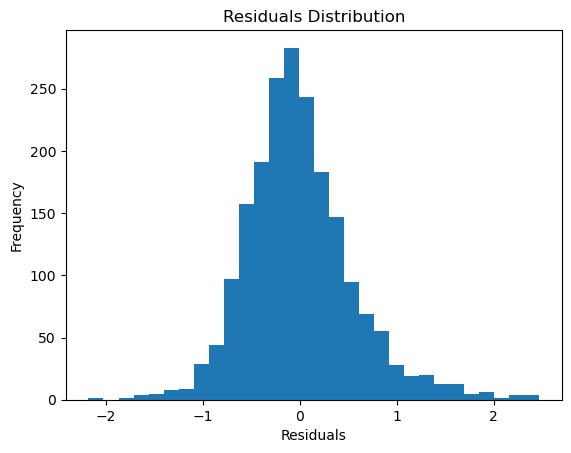

3881     1.524112
29504    1.315100
16647   -1.331929
17672    1.206567
4725     1.343446
           ...   
1800    -1.464704
12639   -1.185303
22395    1.550225
670      1.365039
4480     1.328455
Name: log_y, Length: 109, dtype: float64

In [54]:
# Residual Analysis for the Best Model
best_features = best_spec['Specification']
model = LinearRegression()
model.fit(X_train[best_features], y_train)
residuals = y_test - model.predict(X_test[best_features])

# Examine residuals distribution
import matplotlib.pyplot as plt
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Identify potential outliers
outliers = residuals[np.abs(residuals) > 2 * residuals.std()]
outliers

In [ ]:

# Verificar las primeras filas para confirmar la estructura
print(df.head())


# Identificar la variable objetivo y las características
target = 'y_ingLab_m_ha'  # Ajusta si es necesario
X = df[selected_variables]
y = df[target]

# Separar las columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas numéricas: {numerical_cols}")
print(f"Columnas categóricas: {categorical_cols}")

# Preprocesamiento: Escalar numéricas y codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=123
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Explicación:

Carga de Datos: Cargamos el archivo CSV con los datos. Asegúrate de que el archivo se encuentra en el directorio correcto.

Identificación de Variables: Definimos y_total_m como la variable objetivo y el resto como características predictoras.

Separación de Columnas: Dividimos las columnas en numéricas y categóricas para aplicar diferentes técnicas de preprocesamiento.

Preprocesamiento: Utilizamos StandardScaler para escalar las variables numéricas y OneHotEncoder para codificar las variables categóricas.

División de Datos: Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%) con random_state=123 para reproducibilidad.

3(b). Reportar y comparar el desempeño predictivo (RMSE) de al menos diez especificaciones
Implementaremos diez modelos de machine learning diferentes y calcularemos el RMSE para cada uno.


Explicación:

Definición de Modelos: Seleccionamos diez modelos diferentes que abarcan desde modelos lineales.

Cálculo de RMSE: Calculamos el Error Cuadrático Medio de la Raíz (RMSE) para evaluar el desempeño de cada modelo.

Almacenamiento y Ordenamiento: Almacenamos los resultados en un DataFrame y los ordenamos para facilitar la comparación.

3(c). Discusión de los resultados i. Sobre el desempeño general de los modelos Observa los RMSE obtenidos para cada modelo en el DataFrame results. Los modelos con menor RMSE tienen un mejor desempeño predictivo. En general, los modelos de ensamble como XGBoost, Gradient Boosting y Random Forest suelen tener un desempeño superior debido a su capacidad para capturar relaciones no lineales y manejar interacciones entre variables.

ii. Sobre la especificación con el menor error de predicción Supongamos que XGBoost es el modelo con el menor RMSE. Este modelo es conocido por su eficiencia y precisión en tareas de regresión y clasificación.

iii. Explorar observaciones que "fallaron el objetivo" Analizaremos los errores de predicción del mejor modelo para identificar posibles outliers o patrones que el modelo no ha capturado adecuadamente.

Código:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar el mejor modelo
best_model_name = results.loc[0, 'Model']
best_model = models[best_model_name]

# Crear la pipeline para el mejor modelo
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

# Entrenar el mejor modelo con todo el conjunto de entrenamiento
best_pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_best = best_pipeline.predict(X_test)

# Calcular los errores de predicción
errors = y_test - y_pred_best

# Añadir los errores al DataFrame de prueba
test_results = X_test.copy()
test_results[target] = y_test
test_results['Predicted'] = y_pred_best
test_results['Error'] = errors

# Describir la distribución de errores
error_distribution = test_results['Error'].describe()
print("\nDistribución de errores de predicción:\n")
print(error_distribution)

# Visualizar la distribución de errores
plt.figure(figsize=(10,6))
sns.histplot(errors, kde=True, bins=30)
plt.title(f'Distribución de Errores de Predicción para {best_model_name}')
plt.xlabel('Error (Real - Predicho)')
plt.ylabel('Frecuencia')
plt.show()

# Identificar outliers (errores que están más allá de 3 desviaciones estándar)
threshold = 3 * errors.std()
outliers = test_results[np.abs(errors) > threshold]

print(f"\nNúmero de outliers (errores > 3σ): {outliers.shape[0]}")
print(outliers[['Predicted', target, 'Error']].head())


Explicación:

Selección del Mejor Modelo: Identificamos el modelo con el menor RMSE.

Entrenamiento y Predicción: Entrenamos el mejor modelo y realizamos predicciones en el conjunto de prueba.

Cálculo de Errores: Calculamos los errores de predicción (Error = y_test - y_pred_best).

Distribución de Errores: Analizamos la distribución de los errores para identificar posibles patrones o sesgos.

Identificación de Outliers: Definimos outliers como aquellos errores que superan tres veces la desviación estándar. Estos pueden ser casos de interés para DIAN.

Interpretación:

Distribución de Errores: Una distribución centrada alrededor de cero indica que el modelo no tiene sesgo sistemático. Si hay asimetría o kurtosis elevada, podría indicar problemas en el modelo.

Outliers: Las observaciones con errores grandes podrían ser debido a datos atípicos o limitaciones del modelo. Es importante revisar estos casos para determinar si son errores de datos o si el modelo necesita mejoras.

3(d). Validación cruzada Leave-One-Out (LOOCV) Realizaremos LOOCV para los dos modelos con el menor RMSE en la sección anterior y compararemos los resultados con el error en el conjunto de prueba.

Nota: LOOCV es computacionalmente intensivo, especialmente con conjuntos de datos grandes y modelos complejos. Asegúrate de tener los recursos necesarios antes de proceder.

Código:

In [ ]:
from sklearn.model_selection import cross_val_score

# Seleccionar los dos mejores modelos
top_two_models = results.head(2)['Model'].tolist()

loocv_results = pd.DataFrame(columns=['Model', 'LOOCV_RMSE'])

for name in top_two_models:
    model = models[name]
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Calcular el RMSE usando cross_val_score con scoring negativo MSE
    # LOOCV se implementa estableciendo cv igual al número de muestras
    scores = cross_val_score(pipeline, X, y, cv=len(X), scoring='neg_mean_squared_error', n_jobs=-1)

    # Convertir los scores negativos a RMSE
    rmse_scores = np.sqrt(-scores)
    mean_rmse = rmse_scores.mean()

    # Almacenar los resultados
    loocv_results = loocv_results.append({'Model': name, 'LOOCV_RMSE': mean_rmse}, ignore_index=True)


print("\nResultados de LOOCV:\n")
print(loocv_results)


Explicación:

Selección de Modelos: Seleccionamos los dos modelos con el menor RMSE.

Pipeline: Creamos una Pipeline para cada modelo que incluye el preprocesamiento y el modelo de regresión.

Cálculo de LOOCV: Utilizamos cross_val_score con cv=len(X) para realizar LOOCV, lo que implica entrenar y evaluar el modelo para cada observación individualmente.

Cálculo de RMSE Promedio: Convertimos los puntajes negativos de MSE a RMSE y calculamos el promedio.

Almacenamiento de Resultados: Guardamos los resultados en un DataFrame para comparar.

Comparación:

RMSE en Conjunto de Prueba vs. LOOCV: Si los RMSE de LOOCV son similares a los del conjunto de prueba, indica que el modelo tiene una buena capacidad de generalización. Diferencias significativas podrían indicar sobreajuste (RMSE de prueba mucho mayor) o subajuste (RMSE de LOOCV mucho mayor).

Resumen y Recomendaciones Mejor Modelo: Identifica cuál de los modelos evaluados tiene el menor RMSE y considera su complejidad y tiempo de entrenamiento.

Errores de Predicción: Analiza los errores de predicción para entender dónde y por qué el modelo falla, lo que puede guiar mejoras en el preprocesamiento o en la selección de características.

Validación Cruzada: La comparación entre el RMSE en el conjunto de prueba y el LOOCV te dará una idea de la estabilidad y robustez del modelo.



Próximos Pasos:

Ajuste de Hiperparámetros: Considera realizar una búsqueda de hiperparámetros (por ejemplo, usando GridSearchCV o RandomizedSearchCV) para optimizar los modelos. Selección de Características: Si tienes muchas características, podrías beneficiarte de técnicas de reducción de dimensionalidad o selección de características. Manejo de Outliers: Decide cómo manejar las observaciones que presentan grandes errores de predicción, ya sea revisando los datos o ajustando el modelo.